In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# 데이터 입력 (mm 단위로 변환)
import pandas as pd

df = pd.read_excel('Bench.xlsx',sheet_name='LA_rate')
df

,vertical,-0.0089,-0.006675,-0.00445,-0.002225,0,0.002225,0.00445,0.006675,0.0089
0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.008316,0.851821,0.875020,0.889437,0.896839,0.898937,0.896839,0.889437,0.875020,0.851821
2,0.016632,0.846899,0.857691,0.861977,0.862372,0.862078,0.862372,0.861977,0.857691,0.846899
3,0.024948,0.843484,0.842815,0.837956,0.832607,0.830506,0.832607,0.837956,0.842815,0.843484
4,0.033264,0.841014,0.834513,0.825842,0.818646,0.816043,0.818646,0.825842,0.834513,0.841014
5,0.041580,0.839147,0.830222,0.820543,0.813191,0.810597,0.813191,0.820543,0.830222,0.839147
6,0.049896,0.837674,0.827922,0.818286,0.811269,0.808813,0.811269,0.818286,0.827922,0.837674
7,0.058212,0.836469,0.826600,0.817353,0.810763,0.808460,0.810763,0.817353,0.826600,0.836469
8,0.066528,0.835449,0.825779,0.817008,0.810828,0.808664,0.810828,0.817008,0.825779,0.835449
9,0.074844,0.834564,0.825226,0.816929,0.811115,0.809073,0.811115,0.816929,0.825226,0.834564


In [10]:
vertical = df['vertical'].to_numpy()
horizontal = pd.Series(df.columns[1:].astype(float)).to_numpy()
# df의 각 열(온도 데이터)을 meshgrid 형태로 변환
temperature = df.iloc[:, 1:].to_numpy()

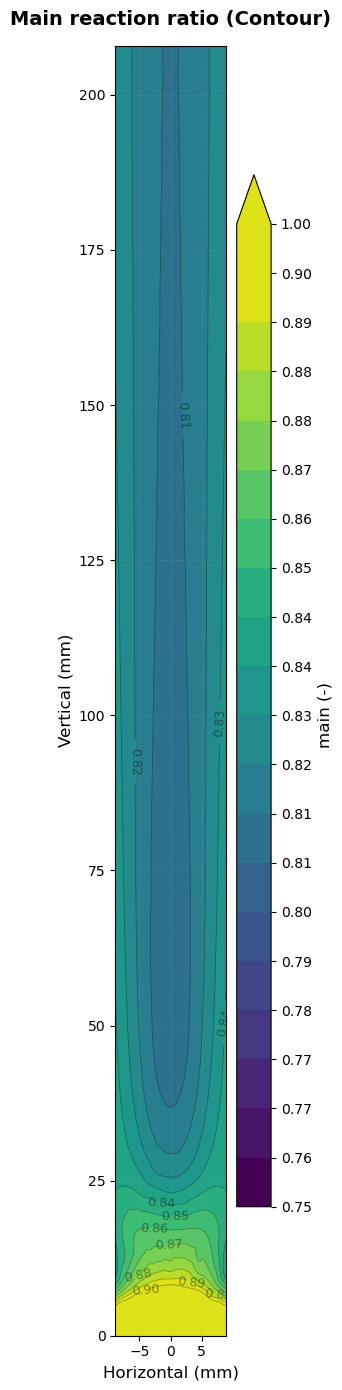

In [11]:
# vertical, horizontal, temperature 변수에 맞게 코드 수정
# 단위가 m이므로 mm로 변환 (1000 곱하기)
vertical_mm = vertical * 1000
horizontal_mm = horizontal * 1000

# 메쉬그리드 생성 (horizontal: x축, vertical: y축, 단위 mm)
X, Y = np.meshgrid(horizontal_mm, vertical_mm)

# 고해상도 보간용 그리드 생성 (단위 mm)
horizontal_fine = np.linspace(horizontal_mm.min(), horizontal_mm.max(), 200)
vertical_fine = np.linspace(vertical_mm.min(), vertical_mm.max(), 500)
X_fine, Y_fine = np.meshgrid(horizontal_fine, vertical_fine)

# 원본 데이터 포인트 (각 위치에 대한 온도값, 단위 mm)
points = np.array([(x, y) for y in vertical_mm for x in horizontal_mm])
values = temperature.flatten()

# cubic 보간으로 부드러운 온도 데이터 생성
temperature_fine = griddata(points, values, (X_fine, Y_fine), method='cubic')

# 0.8~0.9 구간만 색상 분리, 0.9 이상은 같은 색상으로 고정
import matplotlib as mpl

# levels 설정: 0.8~0.9 구간을 세분화, 0.9 이상은 마지막 구간으로 묶음
min_val = np.nanmin(temperature_fine)
max_val = np.nanmax(temperature_fine)
level_start = 0.75
level_end = min(max_val, 0.9)
# 0.8~0.9 구간을 10등분, 0.9 이상은 마지막 구간
levels = np.concatenate([
    np.linspace(level_start, level_end, 20),
    [max_val]
])

# 컬러맵 생성: 0.8~0.9 구간은 'coolwarm'에서 추출, 0.9 이상은 마지막 색상으로 고정
base_cmap = plt.get_cmap('viridis')
n_colors = len(levels) - 1
colors = [base_cmap(i / (n_colors-1)) for i in range(n_colors-1)]
# 0.9 이상 구간은 마지막 색상으로 고정
colors.append(colors[-1])
custom_cmap = mpl.colors.ListedColormap(colors)

# 노말라이저: 0.8~0.9 구간만 색상 분리, 0.9 이상은 같은 색상
norm = mpl.colors.BoundaryNorm(boundaries=levels, ncolors=custom_cmap.N)

# 플롯 생성 (세로로 긴 반응기 형상)
fig, ax = plt.subplots(figsize=(6, 14))

# 등고선 플롯
contourf = ax.contourf(X_fine, Y_fine, temperature_fine, levels=levels, cmap=custom_cmap, norm=norm, extend='max')
contour = ax.contour(X_fine, Y_fine, temperature_fine, levels=levels, colors='black', 
                    linewidths=0.5, alpha=0.4)
ax.clabel(contour, inline=True, fontsize=9, fmt='%.2f')

ax.set_xlabel('Horizontal (mm)', fontsize=12)
ax.set_ylabel('Vertical (mm)', fontsize=12)
ax.set_title('Main reaction ratio (Contour)', fontsize=14, fontweight='bold', pad=15)
ax.set_aspect('equal')

# 컬러바 추가
cbar = plt.colorbar(contourf, ax=ax, label='main (-)', pad=0.02, shrink=0.8, aspect=30, ticks=levels)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('main (-)', fontsize=12)
cbar.ax.set_yticklabels([f'{l:.2f}' for l in levels])

# 그리드 추가
ax.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

In [12]:
# 그래프를 파일로 저장 (예: 'temperature_contour.png')
fig.savefig('main_ratio_contour.png', dpi=300, bbox_inches='tight')
